In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [14]:
import os
ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'Dataset')
DATASET = os.path.join(DATA_DIR, 'housing.csv')

In [15]:
df = pd.read_csv(DATASET)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
df = df[['area','price']]

In [8]:
df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [9]:
mean = np.array(df.mean())
std = np.array(df.std())
print(mean)
print(std)


[   5150.5412844  4766729.24770642]
[   2170.14102251 1870439.61565739]


In [10]:
df = (df-mean)/std

In [11]:
df

,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716
...,...,...
540,-0.990968,-1.575421
541,-1.267448,-1.603676
542,-0.705273,-1.612845
543,-1.032440,-1.612845


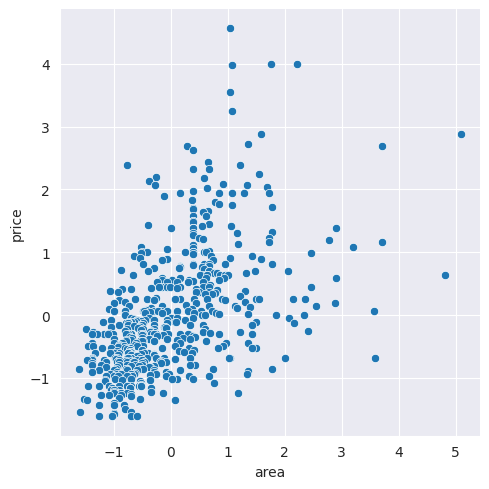

In [12]:
sns.relplot(
    data=df,
    x='area',
    y='price',
)


In [13]:
df.head()

,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716


In [16]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [17]:
df = df[
    [
        'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus','price'
    ]
]

In [18]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


Data Preprocessing and cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [23]:
numerical_col = df.select_dtypes(include='number').columns
numerical_col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'], dtype='object')

In [25]:
categorical_col = df.select_dtypes(include='object').columns
categorical_col

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [30]:
'''Standardize numerical columns'''

num_mean = df[numerical_col].mean()
num_mean

area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
price        4.766729e+06
dtype: float64

In [31]:
num_std = df[numerical_col].std()
num_std

area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
price        1.870440e+06
dtype: float64

In [34]:
df[numerical_col] =  (df[numerical_col] - num_mean) / num_std
df.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,1.045766,1.402131,1.420507,1.376952,yes,no,no,no,yes,1.516299,yes,furnished,4.562174
1,1.755397,1.402131,5.400847,2.529700,yes,no,no,no,yes,2.676950,no,furnished,4.000809
2,2.216196,0.047235,1.420507,0.224204,yes,no,yes,no,no,1.516299,yes,semi-furnished,4.000809
3,1.082630,1.402131,1.420507,0.224204,yes,no,yes,no,yes,2.676950,yes,furnished,3.982096
4,1.045766,1.402131,-0.569663,0.224204,yes,yes,yes,no,yes,1.516299,no,furnished,3.551716


In [35]:
df[numerical_col]

,area,bedrooms,bathrooms,stories,parking,price
0,1.045766,1.402131,1.420507,1.376952,1.516299,4.562174
1,1.755397,1.402131,5.400847,2.529700,2.676950,4.000809
2,2.216196,0.047235,1.420507,0.224204,1.516299,4.000809
3,1.082630,1.402131,1.420507,0.224204,2.676950,3.982096
4,1.045766,1.402131,-0.569663,0.224204,1.516299,3.551716
...,...,...,...,...,...,...
540,-0.990968,-1.307661,-0.569663,-0.928544,1.516299,-1.575421
541,-1.267448,0.047235,-0.569663,-0.928544,-0.805002,-1.603676
542,-0.705273,-1.307661,-0.569663,-0.928544,-0.805002,-1.612845
543,-1.032440,0.047235,-0.569663,-0.928544,-0.805002,-1.612845


In [36]:
df[categorical_col] = df[categorical_col].apply(
    lambda col : pd.Categorical(col).codes
)

df.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,1.045766,1.402131,1.420507,1.376952,1,0,0,0,1,1.516299,1,0,4.562174
1,1.755397,1.402131,5.400847,2.529700,1,0,0,0,1,2.676950,0,0,4.000809
2,2.216196,0.047235,1.420507,0.224204,1,0,1,0,0,1.516299,1,1,4.000809
3,1.082630,1.402131,1.420507,0.224204,1,0,1,0,1,2.676950,1,0,3.982096
4,1.045766,1.402131,-0.569663,0.224204,1,1,1,0,1,1.516299,0,0,3.551716


Split the Dataset

In [44]:
seed = 43
np.random.seed(seed)
np.random.rand()


0.11505456638977896

In [ ]:
def split_dataset(dataset,train_size=0.6,validation_size=0.2):
    no_of_examples = len(dataset)
    random_indices = np.random.permutation(no_of_examples)

    train_size = int(train_size*no_of_examples)
    validation_size = int(validation_size*no_of_examples)

    train = 


